 <br>CRIM - per capita crime rate by town <br>
 <br>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
 <br>INDUS - proportion of non-retail business acres per town.<br>
 <br>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
 <br>NOX - nitric oxides concentration (parts per 10 million)<br>
 <br>RM - average number of rooms per dwelling<br>
 <br>AGE - proportion of owner-occupied units built prior to 1940<br>
 <br>DIS - weighted distances to five Boston employment centres<br>
 <br>RAD - index of accessibility to radial highways<br>
 <br>TAX - full-value property-tax rate per $\$$10000<br>
 <br>PTRATIO - pupil-teacher ratio by town<br>
 <br>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
 <br>LSTAT - %lower status of the population<br>
<br>MEDV - Median value of owner-occupied homes in $1000's<br> (target variable)

-----------------------------------------------------------------------------------------------------------------------------

i am going to use Linear regression, and therefore it is important  to know the assumptions of linear regression
they are...
1. Linear relationship between dependent variable and independent variable.
2. Homoscadacity of residuals i.e variance of the residuals should be constant.
3. No auto-corelation of residuals
4. No co relation of between independent variables

In [2]:
import pandas as pd
import numpy as np

In [3]:
train=pd.read_csv("../dataset/Boston housing data/train.csv")

test=pd.read_csv("../dataset/Boston housing data/test.csv")

In [4]:
train_copy=train.copy()
test_copy=test.copy()

In [4]:
# train=train_copy
# test=test_copy

In [5]:
train["source"]="train"
test["source"]="test"

data=pd.concat([train,test],axis=0)
data=data.drop(columns=("ID"),axis=1)

In [6]:
print("train:\n",train.shape,"\ntest:\n",test.shape,"\ndata:\n",data.shape)
print()
print(data.columns)
print()
print(data.dtypes)

train:
 (333, 16) 
test:
 (173, 15) 
data:
 (506, 15)

Index(['age', 'black', 'chas', 'crim', 'dis', 'indus', 'lstat', 'medv', 'nox',
       'ptratio', 'rad', 'rm', 'source', 'tax', 'zn'],
      dtype='object')

age        float64
black      float64
chas         int64
crim       float64
dis        float64
indus      float64
lstat      float64
medv       float64
nox        float64
ptratio    float64
rad          int64
rm         float64
source      object
tax          int64
zn         float64
dtype: object


In [7]:
data.head(10)

,age,black,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,source,tax,zn
0,65.2,396.90,0,0.00632,4.0900,2.31,4.98,24.0,0.538,15.3,1,6.575,train,296,18.0
1,78.9,396.90,0,0.02731,4.9671,7.07,9.14,21.6,0.469,17.8,2,6.421,train,242,0.0
2,45.8,394.63,0,0.03237,6.0622,2.18,2.94,33.4,0.458,18.7,3,6.998,train,222,0.0
3,54.2,396.90,0,0.06905,6.0622,2.18,5.33,36.2,0.458,18.7,3,7.147,train,222,0.0
4,66.6,395.60,0,0.08829,5.5605,7.87,12.43,22.9,0.524,15.2,5,6.012,train,311,12.5
5,94.3,392.52,0,0.22489,6.3467,7.87,20.45,15.0,0.524,15.2,5,6.377,train,311,12.5
6,82.9,396.90,0,0.11747,6.2267,7.87,13.27,18.9,0.524,15.2,5,6.009,train,311,12.5
7,39.0,390.50,0,0.09378,5.4509,7.87,15.71,21.7,0.524,15.2,5,5.889,train,311,12.5
8,61.8,396.90,0,0.62976,4.7075,8.14,8.26,20.4,0.538,21.0,4,5.949,train,307,0.0
9,84.5,380.02,0,0.63796,4.4619,8.14,10.26,18.2,0.538,21.0,4,6.096,train,307,0.0


## Descriptive statistics on all the variables

In [8]:
data.describe()

,age,black,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,333.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,0.069170,3.613524,3.795043,11.136779,12.653063,22.768769,0.554695,18.455534,9.549407,6.284634,408.237154,11.363636
std,28.148861,91.294864,0.253994,8.601545,2.105710,6.860353,7.141062,9.173468,0.115878,2.164946,8.707259,0.702617,168.537116,23.322453
min,2.900000,0.320000,0.000000,0.006320,1.129600,0.460000,1.730000,5.000000,0.385000,12.600000,1.000000,3.561000,187.000000,0.000000
25%,45.025000,375.377500,0.000000,0.082045,2.100175,5.190000,6.950000,17.400000,0.449000,17.400000,4.000000,5.885500,279.000000,0.000000
50%,77.500000,391.440000,0.000000,0.256510,3.207450,9.690000,11.360000,21.600000,0.538000,19.050000,5.000000,6.208500,330.000000,0.000000
75%,94.075000,396.225000,0.000000,3.677082,5.188425,18.100000,16.955000,25.000000,0.624000,20.200000,24.000000,6.623500,666.000000,12.500000
max,100.000000,396.900000,1.000000,88.976200,12.126500,27.740000,37.970000,50.000000,0.871000,22.000000,24.000000,8.780000,711.000000,100.000000


In [9]:
data.isna().sum()

age          0
black        0
chas         0
crim         0
dis          0
indus        0
lstat        0
medv       173
nox          0
ptratio      0
rad          0
rm           0
source       0
tax          0
zn           0
dtype: int64

In [10]:
skewness=data.skew()
skewness=pd.DataFrame(data=[skewness],columns=data.columns)


## EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

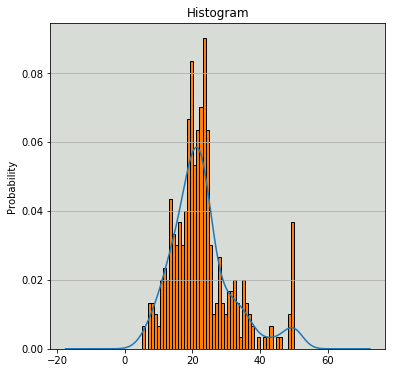

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
data["medv"].plot.kde(ax=ax, legend=False, title='Histogram')
data["medv"].plot.hist(density=True, ax=ax,bins=int(50),edgecolor = 'black')
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')
##looks like target variable is skewed towards right i.e positive skewed

In [13]:
# fig=plt.figure(figsize=(6,6))

# plt.hist(data["medv"],color = 'blue', edgecolor = 'black',bins = int(50/1))
# plt.show()


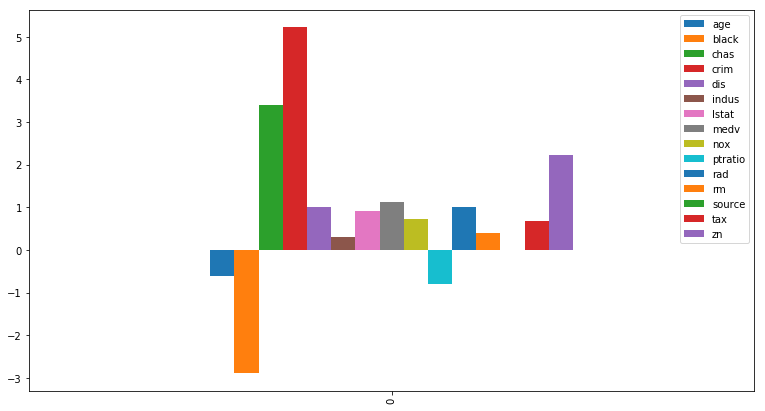

In [14]:
fig,ax=plt.subplots(figsize=(13,7))
skewness.plot(kind="bar",ax=ax)

In [15]:
# ##lets plot skewness of the data

# colnames=data.columns

# fig,ax=plt.subplots(figsize=(15,6))
# ax.hist(x=skewness,
#         color='green')
# #ax.set_xticks(skewness)
# ax.set_xticklabels(colnames)
# #ax.invert_xaxis()
# plt.show()

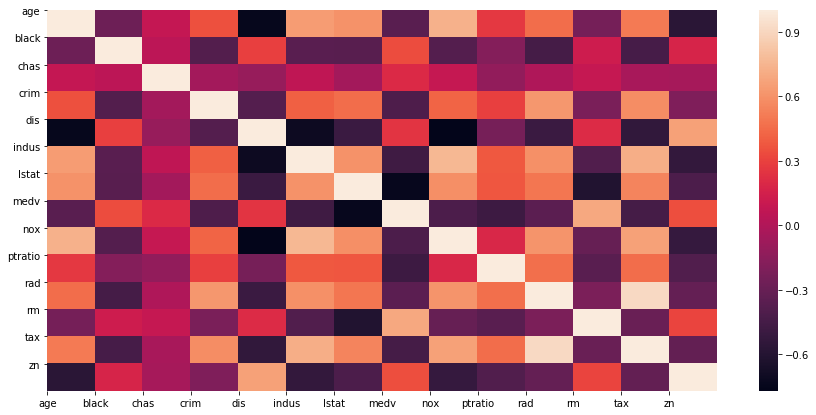

In [18]:
def plot_corr(df,size1=15,size2=7):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size1, size2))
#     ax.matshow(corr)
    sns.heatmap(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(data)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


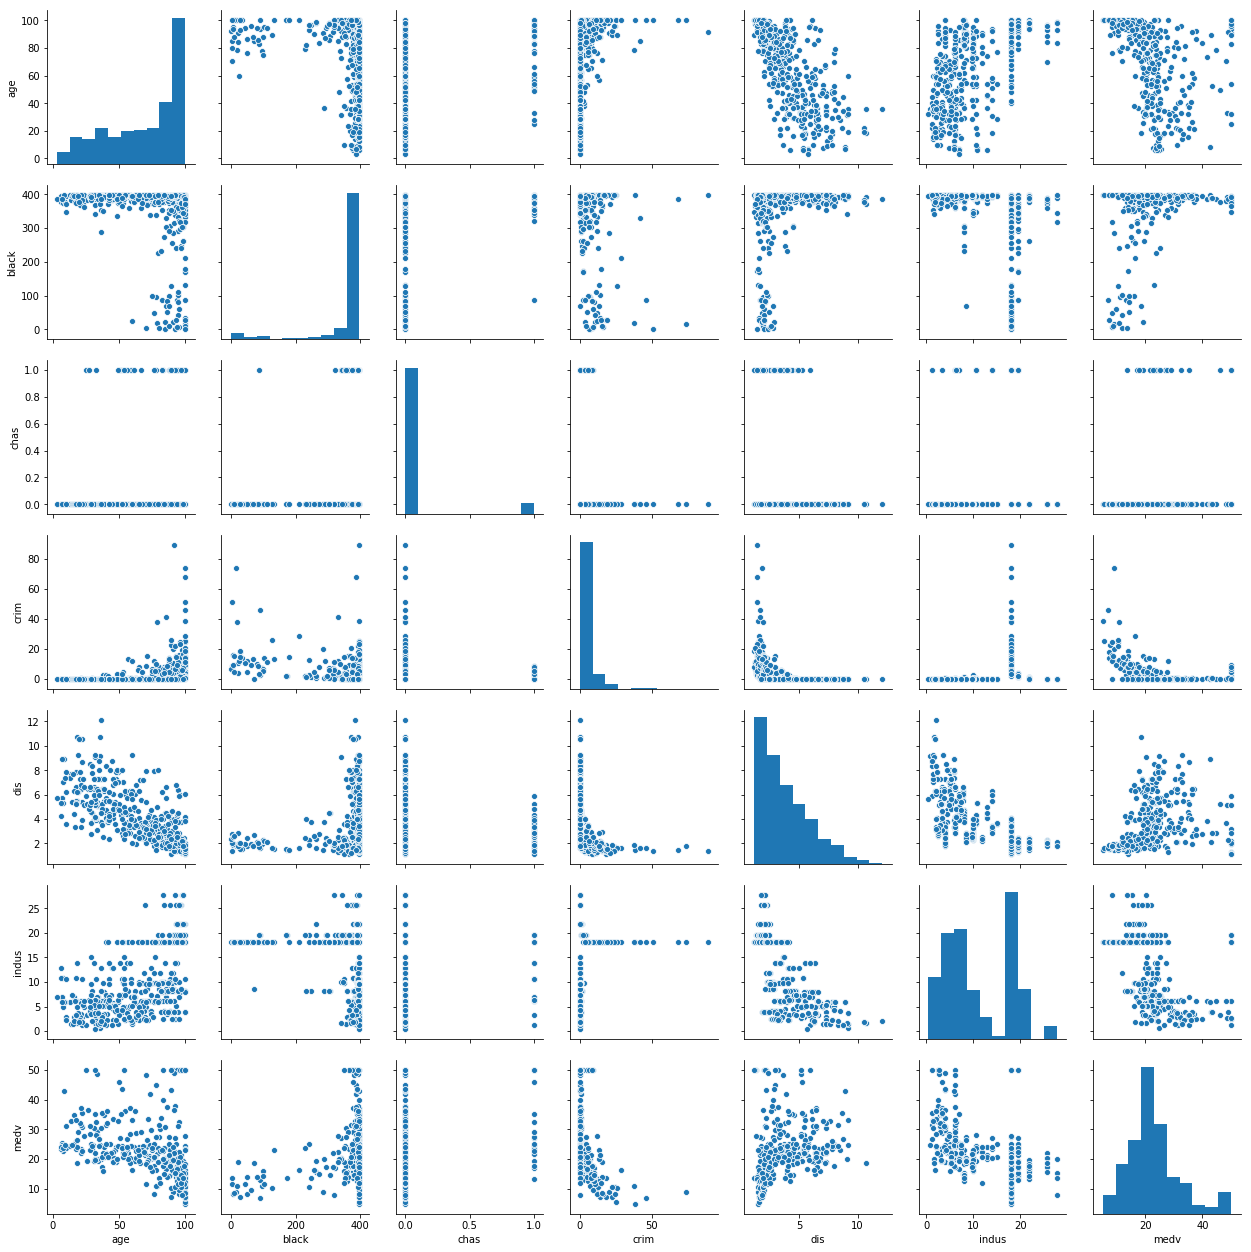

In [19]:
sns.pairplot(data[['age', 'black', 'chas', 'crim', 'dis', 'indus','medv']])

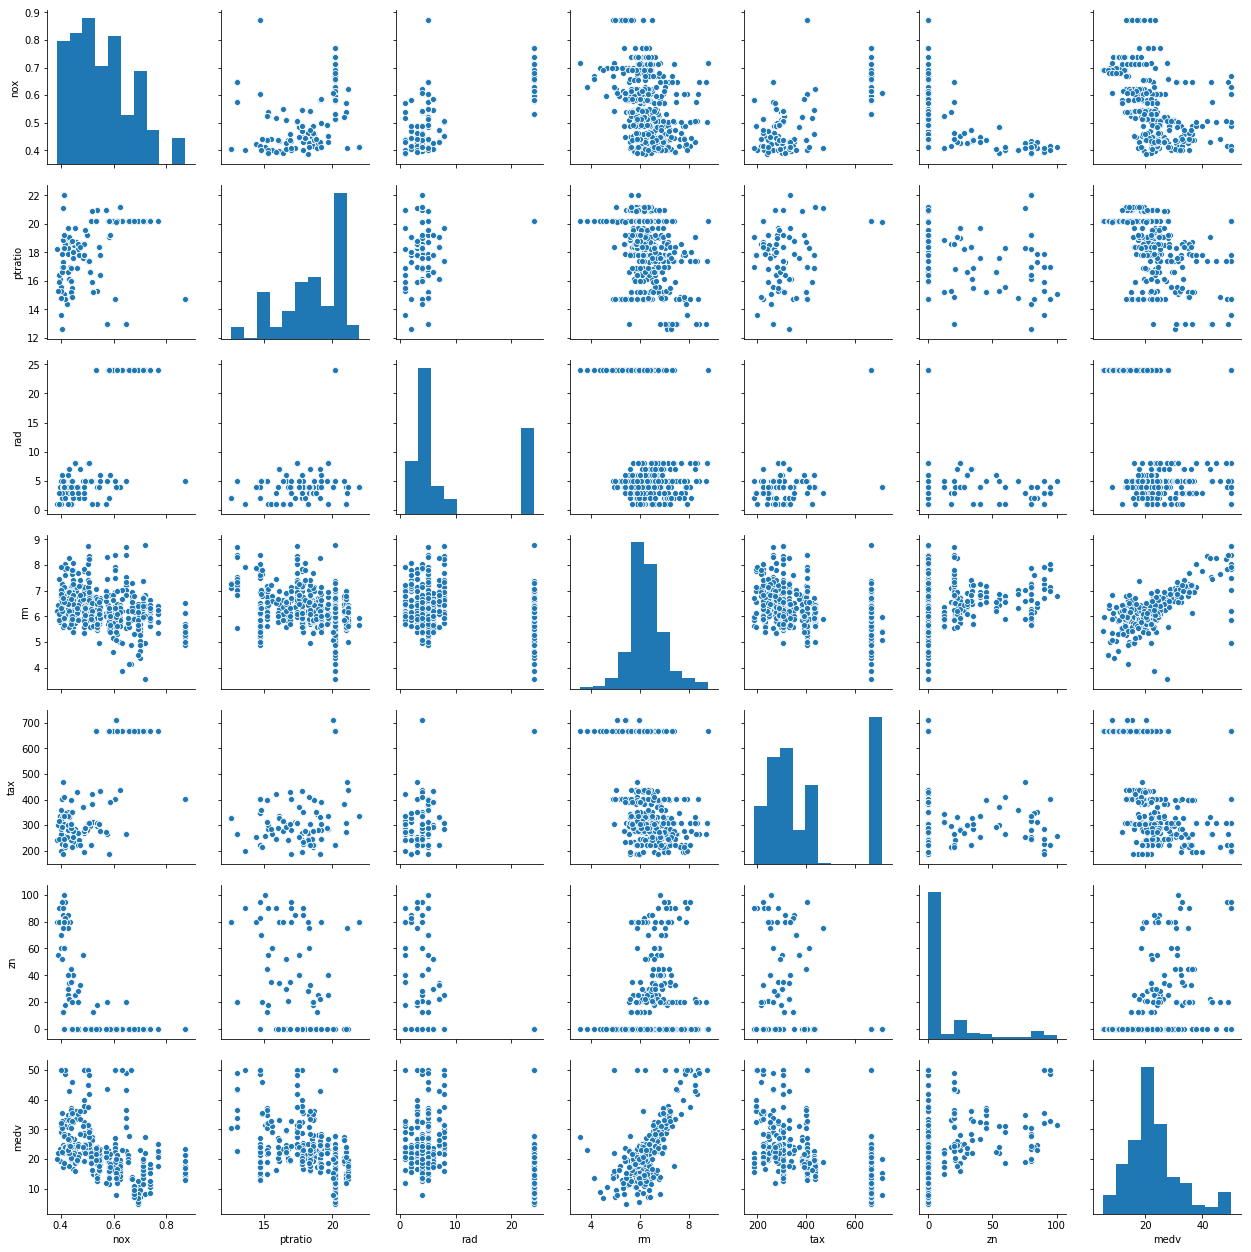

In [20]:
sns.pairplot(data[['nox', 'ptratio', 'rad', 'rm', 'tax', 'zn','medv']])

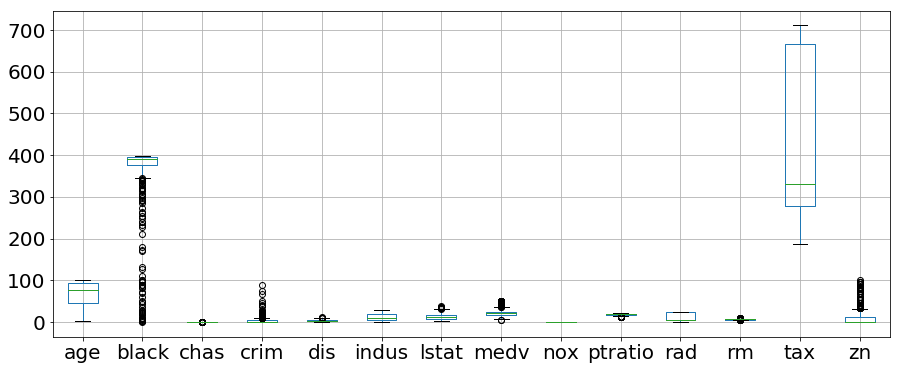

In [21]:
data.boxplot(figsize=(15,6),fontsize=20)

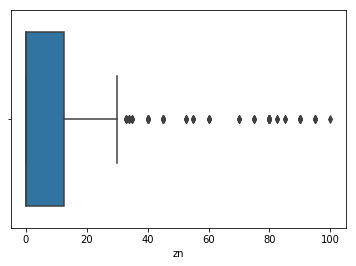

In [22]:
sns.boxplot(data["zn"])   #age,black, chas, crim, dis, dis, lstat, medv, nox, ptratio, rad, 
#no outlier- age, indus, nox, rad, tax,  
#ouliers- black(many), chas(few), crim(many), dis(few), lstat(few), medv(many), ptratio(few), rm(few), zn(many)  

## Feature engineering

In [27]:
train_w_ol=train_copy
test_w_ol=test_copy

In [31]:
train_w_ol=train_w_ol.drop(columns=["ID"],axis=1)
test_w_ol=test_w_ol.drop(columns=["ID"],axis=1)

In [33]:
def Iqr(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    
    IQR_df=IQR.reset_index()
    iqr_col=IQR_df["index"]
    return IQR,iqr_col,Q1,Q3


In [35]:
IQR1,iqr_col1,Q11,Q31=Iqr(train_w_ol)
train_wo_ol = train[~((train_w_ol < (Q11 - 1.5 * IQR1)) |(train_w_ol > (Q31 + 1.5 * IQR1))).any(axis=1)]
IQR2,iqr_col2,Q12,Q32=Iqr(test_w_ol)
test_wo_ol = test[~((test_w_ol < (Q12 - 1.5 * IQR2)) |(test_w_ol > (Q32 + 1.5 * IQR2))).any(axis=1)]


    

In [167]:
train_wo_ol["source"]="train"
test_wo_ol["source"]="test"

data_wo_ol=pd.concat([train_wo_ol,test_wo_ol],axis=0)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Model Building

#### 1 Linear regression without gridsearch

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

train=data[data["source"]=="train"]

X_train=train.drop(columns=["medv","source"],axis=1)
y_train= train[["medv"]]

test=data[data["source"]=="test"]

X_test= test.drop(columns=["source"],axis=1)

Lin_r=LinearRegression()

Lin_r.fit(X_train,y_train)


# #Lin_r.predict(X_test)

Lin_r_coeff=pd.DataFrame(Lin_r.coef_[0],index=X_train.columns)
print("Regression coefficients:",Lin_r_coeff)
print()

r2=r2_score(y_train,Lin_r.predict(X_train))
print("r2 squred:",r2)
#print("Training score",Lin_r.score(X_train,y_train))    another way of measuring R2

n =len(X_train)
r2_adj =1- (1-r2)*(n-1)/(n-(13+1))
print("Adjusted r2",r2_adj)
print("MSE",mean_squared_error(y_train,Lin_r.predict(X_train)))

Regression coefficients:                  0
age      -0.004627
black     0.011666
chas      3.784864
crim     -0.052489
dis      -1.548823
indus     0.053855
lstat    -0.600315
nox     -15.739657
ptratio  -0.856976
rad       0.328967
rm        3.768832
tax      -0.012866
zn        0.047445

r2 squred: 0.7331394355527803
Adjusted r2 0.7222642401364359
MSE 22.38954942364789


#### 2 Spliting train into train and validation set to evaluate the model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,adjusted_rand_score
from sklearn.model_selection import train_test_split

X=train[["age","black","chas","crim","dis","indus","lstat","nox","ptratio","rad","rm","tax","zn"]].values
y=train[["medv"]].values

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,random_state=0)

Lin_r=LinearRegression()

Lin_r.fit(X_train,y_train)

print("Best train score:",Lin_r.score(X_train,y_train))

Best train score: 0.7367890679094278


In [45]:
predict1=Lin_r.predict(X_val)

mean squared error 26.226160286880475
r squared: 0.6831900012610155


Text(0, 0.5, 'Residuals')

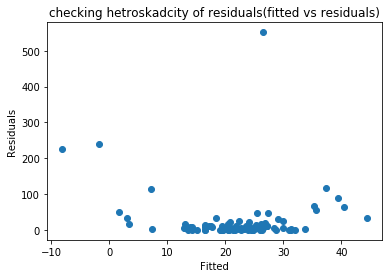

In [58]:
print("mean squared error",mean_squared_error(y_val,predict1))
print("r squared:",r2_score(y_val,predict1))
#print("Adjusted r squared",adjusted_rand_score(y_val,predict1))

plt.scatter(predict1,(y_val - predict1) ** 2)
plt.title("checking hetroskadcity of residuals(fitted vs residuals)")
plt.xlabel("Fitted")
plt.ylabel("Residuals")


#### 3 Linear regression with gridsearch

In [150]:
# in this model i am trying to create a validation set from the train set to test my model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,train_test_split

X=train[["age","black","chas","crim","dis","indus","lstat","nox","ptratio","rad","rm","tax","zn"]].values
y=train[["medv"]].values

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,random_state=0)

parameters={"fit_intercept":(True,False),"normalize":(True,False)}
Lin_r_grid=GridSearchCV(Lin_r,param_grid=parameters,cv=2)

Lin_r_grid.fit(X_train,y_train)

print("Best parameters",Lin_r_grid.best_params_)
print("Best Train score",Lin_r_grid.best_score_)
print("Best estimator",Lin_r_grid.best_estimator_)


Best parameters {'fit_intercept': True, 'normalize': True}
Best Train score 0.6823067628458215
Best estimator LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


Mean squared error 26.22616028688048
r squared: 0.6831900012610155


Text(0, 0.5, 'Residuals')

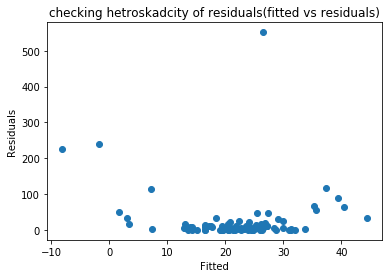

In [155]:
Lin_r_best_param=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
Lin_r_best_param.fit(X_train,y_train)
predict2=Lin_r_best_param.predict(X_val)
print("Mean squared error",mean_squared_error(y_val,predict2))
print("r squared:",r2_score(y_val,predict2))

plt.scatter(predict2,(y_val - predict2) ** 2)
plt.title("checking hetroskadcity of residuals(fitted vs residuals)")
plt.xlabel("Fitted")
plt.ylabel("Residuals")

#### 4 outliers removed

Regression coefficients:
 crim      -7.359747e-01
zn        -3.541646e-03
indus     -4.166126e-03
chas      -6.855627e-15
nox       -9.300632e-01
rm         4.586514e+00
age       -5.144445e-02
dis       -8.016238e-01
rad        3.737723e-01
tax       -1.274896e-02
ptratio   -5.910570e-01
black      7.478462e-04
lstat     -2.181171e-01
dtype: float64

r2 squred: 0.6969838780826889
Adjusted r2 0.6735362019819446
MSE 6.443060689499173


Text(0, 0.5, 'Residuals')

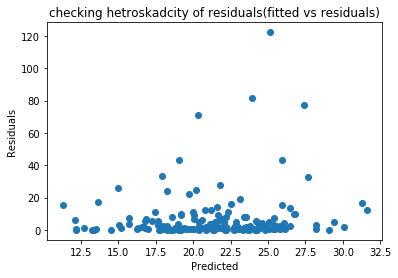

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

X_train4=train_wo_ol.drop(columns=['ID','source','medv'])
y_train4=train_wo_ol["medv"]
X_test4=test_wo_ol.drop(columns=['ID','source'])

Lin_r=LinearRegression()
Lin_r.fit(X_train4,y_train4)


Lin_r_coeff=pd.Series(Lin_r.coef_,index=X_train4.columns)
print("Regression coefficients:\n",Lin_r_coeff)
print()

r2=r2_score(y_train4,Lin_r.predict(X_train4))
print("r2 squred:",r2)
#print("Training score",Lin_r.score(X_train,y_train))    another way of measuring R2

n =len(X_train4)
r2_adj =1- (1-r2)*(n-1)/(n-(13+1))
print("Adjusted r2",r2_adj)
print("MSE",mean_squared_error(y_train4,Lin_r.predict(X_train4)))

plt.scatter(Lin_r.predict(X_train4),(y_train4 - Lin_r.predict(X_train4)) ** 2)
plt.title("checking hetroskadcity of residuals(fitted vs residuals)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

##### 5 log transformation with outlier removed

Regression coefficients:
 crim      -4.495746e-02
zn        -4.342998e-04
indus      1.384778e-03
chas      -1.144917e-16
nox       -1.474040e-02
rm         1.917901e-01
age       -2.495830e-03
dis       -3.399617e-02
rad        1.958968e-02
tax       -5.849138e-04
ptratio   -2.796121e-02
black      1.125225e-04
lstat     -1.210012e-02
dtype: float64

r2 squred: 0.7189418866637718
Adjusted r2 0.6971933421794207
MSE 0.012923200620030436


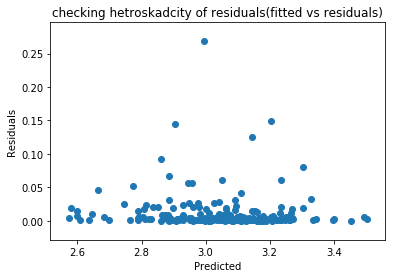

In [134]:
X_train5=X_train4
y_train5=np.log(y_train4)

X_test5=X_test4

#Lin_r=LinearRegression()

Lin_r.fit(X_train5,y_train5)

Lin_r_coeff=pd.Series(Lin_r.coef_,index=X_train5.columns)
print("Regression coefficients:\n",Lin_r_coeff)

print()

r2=r2_score(y_train5,Lin_r.predict(X_train5))
print("r2 squred:",r2)
#print("Training score",Lin_r.score(X_train,y_train))    another way of measuring R2

n =len(X_train5)
r2_adj =1- (1-r2)*(n-1)/(n-(13+1))
print("Adjusted r2",r2_adj)
print("MSE",mean_squared_error(y_train5,Lin_r.predict(X_train5)))

plt.scatter(Lin_r.predict(X_train5),(y_train5 - Lin_r.predict(X_train5)) ** 2)
plt.title("checking hetroskadcity of residuals(fitted vs residuals)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##### 6 log transforamtion with ouliers

Regression coefficients:
 crim       -0.052489
zn          0.047445
indus       0.053855
chas        3.784864
nox       -15.739657
rm          3.768832
age        -0.004627
dis        -1.548823
rad         0.328967
tax        -0.012866
ptratio    -0.856976
black       0.011666
lstat      -0.600315
dtype: float64

r2 squred: 0.7331394355527803
Adjusted r2 0.7222642401364359
MSE 22.38954942364789


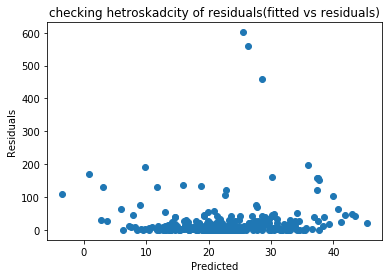

In [136]:
X_train6=train_w_ol.drop(columns=["medv"],axis=1)
y_train6=train_w_ol["medv"]

Lin_r.fit(X_train6,y_train6)

Lin_r_coeff=pd.Series(Lin_r.coef_,index=X_train6.columns)
print("Regression coefficients:\n",Lin_r_coeff)
print()

r2=r2_score(y_train6,Lin_r.predict(X_train6))
print("r2 squred:",r2)
#print("Training score",Lin_r.score(X_train,y_train))    another way of measuring R2

n =len(X_train6)
r2_adj =1- (1-r2)*(n-1)/(n-(13+1))
print("Adjusted r2",r2_adj)
print("MSE",mean_squared_error(y_train6,Lin_r.predict(X_train6)))

plt.scatter(Lin_r.predict(X_train6),(y_train6 - Lin_r.predict(X_train6)) ** 2)
plt.title("checking hetroskadcity of residuals(fitted vs residuals)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# MODEL WITH OULIER REMOVED AND WITH LOG TRANSFORMATION(TO REMOVE SKEWNESS) HAS HIGHEST R2 AND Adj R2 AND LOWEST MSE